In [73]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [94]:
# Defining Antecedents
usage_rate = ctrl.Antecedent(np.arange(0, 101, 1), 'usage_rate')
delivery_time = ctrl.Antecedent(np.arange(0, 101, 1), 'delivery_time')
supplier_reliability = ctrl.Antecedent(np.arange(0, 101, 1), 'supplier_reliability')
budget = ctrl.Antecedent(np.arange(0, 101, 1), 'budget')

In [95]:
# Defining Membership Functions
usage_rate.automf(3, names=['slow', 'moderate', 'fast'])
delivery_time.automf(3, names=['short', 'moderate', 'long'])
supplier_reliability.automf(3, names=['low', 'moderate', 'high'])
budget.automf(3, names=['low', 'moderate', 'high'])

In [96]:
# Defining the Control Variable; Consequent
procurement_action_universe = np.arange(0, 101, 1)
procurement_action = ctrl.Consequent(np.arange(0, 101, 1), 'procurement_action')
procurement_action['low_priority'] = fuzz.trimf(procurement_action.universe, [0, 0, 50])
procurement_action['moderate_priority'] = fuzz.trimf(procurement_action.universe, [0, 50, 100])
procurement_action['high_priority'] = fuzz.trimf(procurement_action.universe, [50, 100, 100])

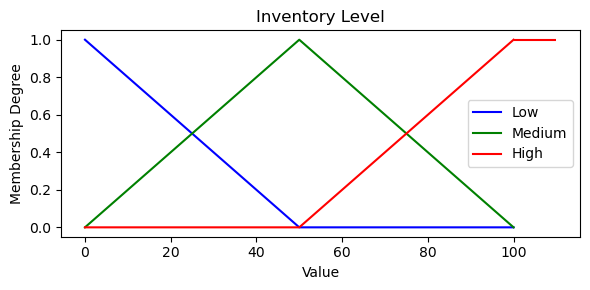

In [97]:
#Plotting Graph, Illustrating Membership Function of Inventory Level as it shows the extension of >100
inventory_level = np.arange(0, 101, 1)
fig, ax = plt.subplots(figsize=(6, 3))

inventory_level_low = fuzz.trimf(inventory_level, [0, 0, 50])
ax.plot(inventory_level, inventory_level_low, 'b', linewidth=1.5, label='Low')

inventory_level_medium = fuzz.trimf(inventory_level, [0, 50, 100])
ax.plot(inventory_level, inventory_level_medium, 'g', linewidth=1.5, label='Medium')

inventory_level_high = fuzz.trimf(inventory_level, [50, 100, 100])
ax.plot(inventory_level, inventory_level_high, 'r', linewidth=1.5, label='High')

# Following line adds the extension horizontally when it reaches its maximum value
ax.hlines(1, 100, 110, colors='r', linewidth=1.5)  # Horizontal line

ax.set_title('Inventory Level')
ax.set_xlabel('Value')
ax.set_ylabel('Membership Degree')
ax.legend()
plt.tight_layout()
plt.show()

In [98]:
#Defining Membership Function For Inventory Level As We Have To Change for the Above Plot
inventory_level = ctrl.Antecedent(np.arange(0, 101, 1), 'inventory_level')
inventory_level.automf(3, names=['low', 'medium', 'high'])

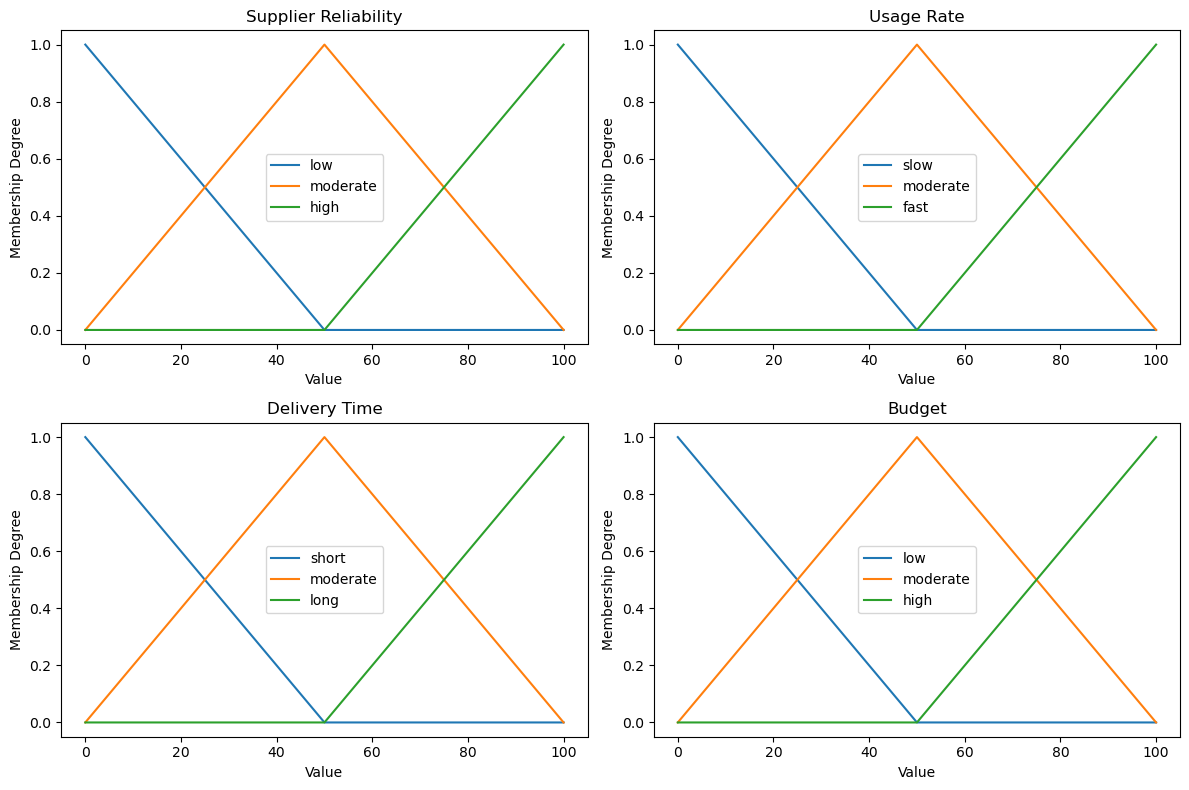

In [99]:
# Function to plot the membership functions
def plot_membership(antecedent, title, ax):
    for term in antecedent.terms:
        ax.plot(antecedent.universe, antecedent[term].mf, linewidth=1.5, label=term)
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Membership Degree')
    ax.legend()

# Creating subplots for each antecedent
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Adjust size as needed
plot_membership(supplier_reliability, 'Supplier Reliability', axs[0, 0])
plot_membership(usage_rate, 'Usage Rate', axs[0, 1])
plot_membership(delivery_time, 'Delivery Time', axs[1, 0])
plot_membership(budget, 'Budget', axs[1, 1])

plt.tight_layout()
plt.show()

In [100]:
rule1 = ctrl.Rule(inventory_level['low'] & usage_rate['fast'] & budget['moderate'], procurement_action['moderate_priority'])
rule2 = ctrl.Rule(inventory_level['medium'] & usage_rate['moderate'] & delivery_time['long'] & supplier_reliability['low'], procurement_action['low_priority'])
rule3 = ctrl.Rule(inventory_level['high'] & usage_rate['slow'] & budget['low'], procurement_action['low_priority'])
rule4 = ctrl.Rule(inventory_level['low'] & usage_rate['fast'] & delivery_time['short'] & supplier_reliability['high'], procurement_action['high_priority'])
rule5 = ctrl.Rule(inventory_level['medium'] & usage_rate['fast'] & delivery_time['moderate'] & supplier_reliability['low'], procurement_action['moderate_priority'])
rule6 = ctrl.Rule(inventory_level['high'] & usage_rate['moderate'] & delivery_time['long'] & supplier_reliability['moderate'], procurement_action['low_priority'])
rule7 = ctrl.Rule(inventory_level['low'] & usage_rate['slow'] & budget['low'], procurement_action['low_priority'])
rule8 = ctrl.Rule(inventory_level['medium'] & usage_rate['slow'] & delivery_time['short'] & supplier_reliability['high'], procurement_action['low_priority'])
rule9 = ctrl.Rule(inventory_level['high'] & usage_rate['slow'] & delivery_time['moderate'] & supplier_reliability['moderate'], procurement_action['low_priority'])
rule10 = ctrl.Rule(inventory_level['low'] & usage_rate['moderate'] & budget['high'], procurement_action['high_priority'])
rule11 = ctrl.Rule(inventory_level['medium'] & usage_rate['moderate'] & delivery_time['short'] & supplier_reliability['high'], procurement_action['moderate_priority'])
rule12 = ctrl.Rule(inventory_level['high'] & usage_rate['moderate'] & delivery_time['short'] & supplier_reliability['low'], procurement_action['low_priority'])

In [101]:
# Example Values
inventory_level_value = 89
usage_rate_value = 56
delivery_time_value = 2
supplier_reliability_value = 8
budget_value = 97

In [102]:
# Calculating Membership Degrees for inventory_level
inventory_level_lo = fuzz.interp_membership(inventory_level.universe, inventory_level['low'].mf, inventory_level_value)
inventory_level_md = fuzz.interp_membership(inventory_level.universe, inventory_level['medium'].mf, inventory_level_value)
inventory_level_hi = fuzz.interp_membership(inventory_level.universe, inventory_level['high'].mf, inventory_level_value)

# Calculating Membership Degrees for usage_rate
usage_rate_lo = fuzz.interp_membership(usage_rate.universe, usage_rate['slow'].mf, usage_rate_value)
usage_rate_md = fuzz.interp_membership(usage_rate.universe, usage_rate['moderate'].mf, usage_rate_value)
usage_rate_hi = fuzz.interp_membership(usage_rate.universe, usage_rate['fast'].mf, usage_rate_value)

# Calculating Membership Degrees for delivery_time
delivery_time_lo = fuzz.interp_membership(delivery_time.universe, delivery_time['short'].mf, delivery_time_value)
delivery_time_md = fuzz.interp_membership(delivery_time.universe, delivery_time['moderate'].mf, delivery_time_value)
delivery_time_hi = fuzz.interp_membership(delivery_time.universe, delivery_time['long'].mf, delivery_time_value)

# Calculating Membership Degrees for supplier_reliability
supplier_reliability_lo = fuzz.interp_membership(supplier_reliability.universe, supplier_reliability['low'].mf, supplier_reliability_value)
supplier_reliability_md = fuzz.interp_membership(supplier_reliability.universe, supplier_reliability['moderate'].mf, supplier_reliability_value)
supplier_reliability_hi = fuzz.interp_membership(supplier_reliability.universe, supplier_reliability['high'].mf, supplier_reliability_value)

# Calculating Membership Degrees for budget
budget_lo = fuzz.interp_membership(budget.universe, budget['low'].mf, budget_value)
budget_md = fuzz.interp_membership(budget.universe, budget['moderate'].mf, budget_value)
budget_hi = fuzz.interp_membership(budget.universe, budget['high'].mf, budget_value)

In [103]:
# Displaying Membership Degrees
import pandas as pd
data = {
    "Low": [inventory_level_lo, usage_rate_lo, delivery_time_lo, supplier_reliability_lo, budget_lo],
    "Medium": [inventory_level_md, usage_rate_md, delivery_time_md, supplier_reliability_md, budget_md],
    "High": [inventory_level_hi, usage_rate_hi, delivery_time_hi, supplier_reliability_hi, budget_hi],
}
df = pd.DataFrame(data, index=["Inventory Level", "Usage Rate", "Delivery Time", "Supplier Reliability", "Budget"])
df

,Low,Medium,High
Inventory Level,0.00,0.22,0.78
Usage Rate,0.00,0.88,0.12
Delivery Time,0.96,0.04,0.00
Supplier Reliability,0.84,0.16,0.00
Budget,0.00,0.06,0.94


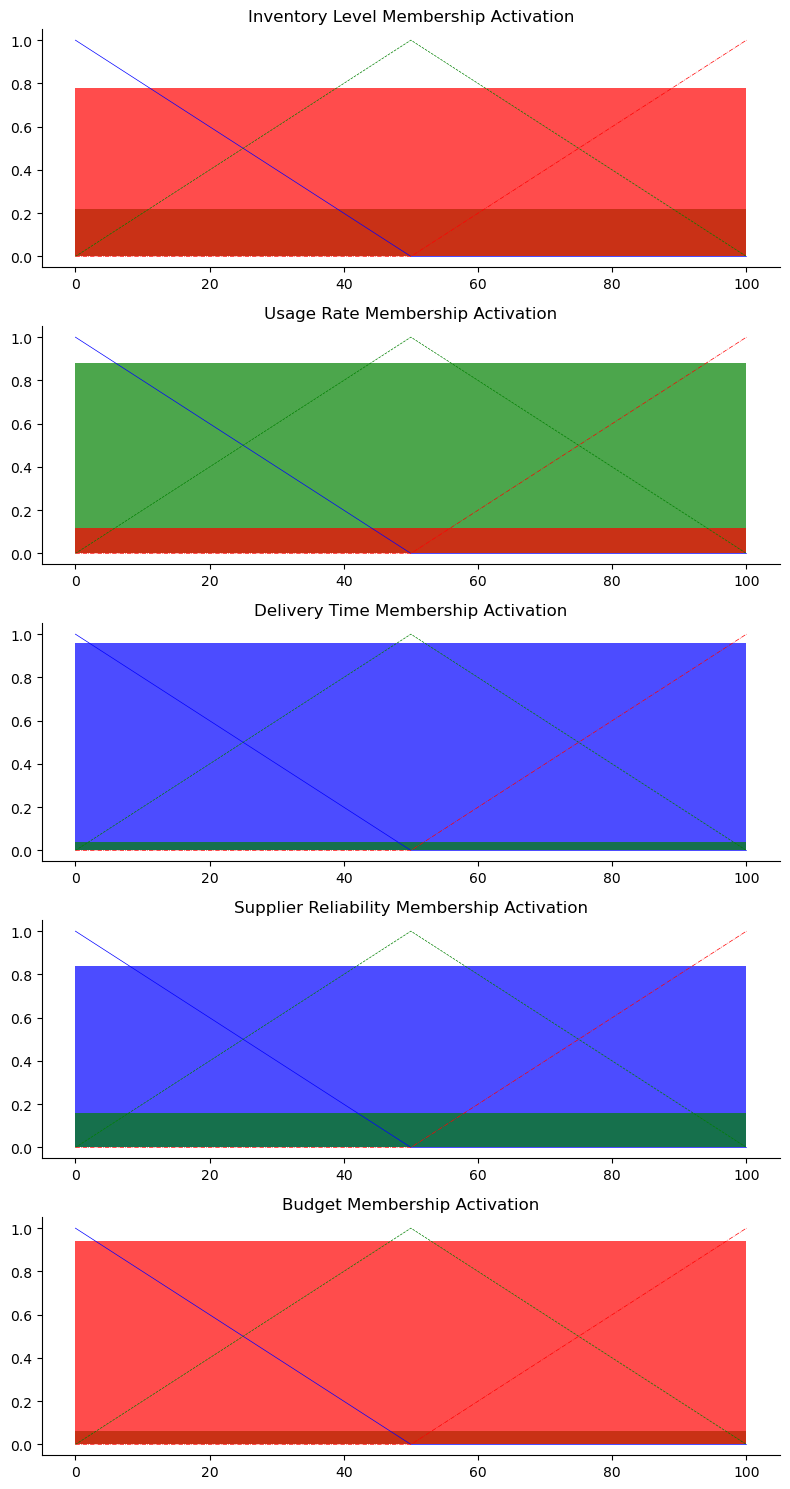

In [104]:
# Plotting Membership Values For Each Antecedent
fig, axs = plt.subplots(5, figsize=(8, 15))

# Plot for Inventory Level
axs[0].fill_between(inventory_level.universe, np.zeros_like(inventory_level['low'].mf), inventory_level_lo, facecolor='b', alpha=0.7)
axs[0].fill_between(inventory_level.universe, np.zeros_like(inventory_level['medium'].mf), inventory_level_md, facecolor='g', alpha=0.7)
axs[0].fill_between(inventory_level.universe, np.zeros_like(inventory_level['high'].mf), inventory_level_hi, facecolor='r', alpha=0.7)
axs[0].set_title('Inventory Level Membership Activation')
axs[0].plot(inventory_level.universe, inventory_level['low'].mf, 'b', linewidth=0.5, linestyle='-')
axs[0].plot(inventory_level.universe, inventory_level['medium'].mf, 'g', linewidth=0.5, linestyle='--')
axs[0].plot(inventory_level.universe, inventory_level['high'].mf, 'r', linewidth=0.5, linestyle='-.')

# Example for Usage Rate
axs[1].fill_between(usage_rate.universe, np.zeros_like(usage_rate['slow'].mf), usage_rate_lo, facecolor='b', alpha=0.7)
axs[1].fill_between(usage_rate.universe, np.zeros_like(usage_rate['moderate'].mf), usage_rate_md, facecolor='g', alpha=0.7)
axs[1].fill_between(usage_rate.universe, np.zeros_like(usage_rate['fast'].mf), usage_rate_hi, facecolor='r', alpha=0.7)
axs[1].set_title('Usage Rate Membership Activation')
axs[1].plot(usage_rate.universe, usage_rate['slow'].mf, 'b', linewidth=0.5, linestyle='-')
axs[1].plot(usage_rate.universe, usage_rate['moderate'].mf, 'g', linewidth=0.5, linestyle='--')
axs[1].plot(usage_rate.universe, usage_rate['fast'].mf, 'r', linewidth=0.5, linestyle='-.')

# Plot for Delivery Time
axs[2].fill_between(delivery_time.universe, np.zeros_like(delivery_time['short'].mf), delivery_time_lo, facecolor='b', alpha=0.7)
axs[2].fill_between(delivery_time.universe, np.zeros_like(delivery_time['moderate'].mf), delivery_time_md, facecolor='g', alpha=0.7)
axs[2].fill_between(delivery_time.universe, np.zeros_like(delivery_time['long'].mf), delivery_time_hi, facecolor='r', alpha=0.7)
axs[2].set_title('Delivery Time Membership Activation')
axs[2].plot(delivery_time.universe, delivery_time['short'].mf, 'b', linewidth=0.5, linestyle='-')
axs[2].plot(delivery_time.universe, delivery_time['moderate'].mf, 'g', linewidth=0.5, linestyle='--')
axs[2].plot(delivery_time.universe, delivery_time['long'].mf, 'r', linewidth=0.5, linestyle='-.')

# Plot for Supplier Reliability
axs[3].fill_between(supplier_reliability.universe, np.zeros_like(supplier_reliability['low'].mf), supplier_reliability_lo, facecolor='b', alpha=0.7)
axs[3].fill_between(supplier_reliability.universe, np.zeros_like(supplier_reliability['moderate'].mf), supplier_reliability_md, facecolor='g', alpha=0.7)
axs[3].fill_between(supplier_reliability.universe, np.zeros_like(supplier_reliability['high'].mf), supplier_reliability_hi, facecolor='r', alpha=0.7)
axs[3].set_title('Supplier Reliability Membership Activation')
axs[3].plot(supplier_reliability.universe, supplier_reliability['low'].mf, 'b', linewidth=0.5, linestyle='-')
axs[3].plot(supplier_reliability.universe, supplier_reliability['moderate'].mf, 'g', linewidth=0.5, linestyle='--')
axs[3].plot(supplier_reliability.universe, supplier_reliability['high'].mf, 'r', linewidth=0.5, linestyle='-.')

# Plot for Budget
axs[4].fill_between(budget.universe, np.zeros_like(budget['low'].mf), budget_lo, facecolor='b', alpha=0.7)
axs[4].fill_between(budget.universe, np.zeros_like(budget['moderate'].mf), budget_md, facecolor='g', alpha=0.7)
axs[4].fill_between(budget.universe, np.zeros_like(budget['high'].mf), budget_hi, facecolor='r', alpha=0.7)
axs[4].set_title('Budget Membership Activation')
axs[4].plot(budget.universe, budget['low'].mf, 'b', linewidth=0.5, linestyle='-')
axs[4].plot(budget.universe, budget['moderate'].mf, 'g', linewidth=0.5, linestyle='--')
axs[4].plot(budget.universe, budget['high'].mf, 'r', linewidth=0.5, linestyle='-.')

# Adjust the layout and remove unnecessary axes
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [105]:
# Adding Rules to the Control System Adding Rules to the Control System
procurement_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
procurement_sim = ctrl.ControlSystemSimulation(procurement_ctrl)

In [106]:
# Inserting Values to Antecedents and Computing Result
procurement_sim.input['inventory_level'] = inventory_level_value
procurement_sim.input['usage_rate'] = usage_rate_value
procurement_sim.input['delivery_time'] = delivery_time_value
procurement_sim.input['supplier_reliability'] = supplier_reliability_value
procurement_sim.input['budget'] = budget_value
procurement_sim.compute()

In [107]:
# Aggregated membership function for the output
aggregated = np.fmax(procurement_action['low_priority'].mf, 
                     np.fmax(procurement_action['moderate_priority'].mf, procurement_action['high_priority'].mf))

In [109]:
# Calculate defuzzified result
procurement_action_value = procurement_sim.output['procurement_action']
procurement_action_activation = fuzz.interp_membership(procurement_action_universe, aggregated, procurement_action_value)

procurement_action_value

21.722760759984524

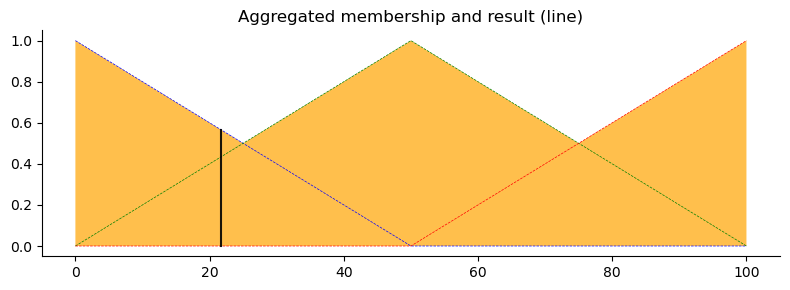

In [89]:
# Visualizing the result
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(procurement_action.universe, procurement_action['low_priority'].mf, 'b', linewidth=0.5, linestyle='--')
ax0.plot(procurement_action.universe, procurement_action['moderate_priority'].mf, 'g', linewidth=0.5, linestyle='--')
ax0.plot(procurement_action.universe, procurement_action['high_priority'].mf, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(procurement_action.universe, np.zeros_like(aggregated), aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([procurement_action_value, procurement_action_value], [0, procurement_action_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [90]:
# Making a decision based on the defuzzified value
if procurement_action_value > 50:  
    decision = "Place an order"
else:
    decision = "No need to place an order"
print("Decision:", decision)

Decision: No need to place an order
